In [62]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10,4)
from IPython.display import Audio, Image
from scipy.signal import sawtooth, square, triang
from scipy.io.wavfile import read
import import_ipynb
from Lesson4_sinusoids import hide_toggle
#hide_toggle()

## Signal modulation: AM 

### Amplitude modulation (AM) with LFO
Just like an envelope function, we can modify one signal by multiplying it with another which will affect its amplitude over time. So a naturally smooth, time-varying signal like a sinusoid is great for creating a tremolo-like effect. 
One way of achieving this is with an LFO (low frequency oscillator)

This technique consists of a single multiplication of two signals: the carrier and the modulator.

The carrier wave is the original wave that we will be altering. The modulator wave refers to the wave that we will be using to alter the carrier wave. It’s more like the factor that changes the carrier wave. 

More precisely, we start with a carrier oscillator and multiply by a modulating oscillator to modify and distort the carrier signal. The result is often referred to as the AM output or the "modulated" signal. However, note that (confusingly) the output is sometimes also referred to as the carrier. (So there is the original carrier and the modulated carrier).

The formula for Amplitude modulation is:

$$s(t) = A_c [(1+k_a m(t))\times\cos(2\pi f_c t)]$$

...where $A_c$ is the carrier amplitude, $k_a$ is referred to as the *modulator index* and $m(t)$ is the modulator signal.

The modulator is always a periodic or quasi-periodic oscillator, with a clearly defined frequency, waveshape, and amplitude.

By taking a signal oscillating at a very low frequency, and using that as our modulator frequency, we can alter a carrier signal's amplitude in a regular way. This is known as an LFO.

* The frequency of the modulator affects the rate of change of the carrier's amplitude. I.e., increasing the frequency of the modulator will increase the tremolo effect in the modulated signal.

* The amplitude (or modulator index) of the modulator affects the *depth* of change of the carrier's amplitude

* The shape of the modulator affects the regular time-varying amplitude shapes in the carrier's amplitude

We can get three different effects depending on the speed of the modulator. For a "sweep" effect we can use a very slow wave (e.g., ~0.1Hz), for a tremolo effect (e.g., 1-5Hz). If you continue to increase the speed to the upper limit of subsonic oscillations you can hear very interesting sounds including a 'growl' like sound at 10-20Hz.

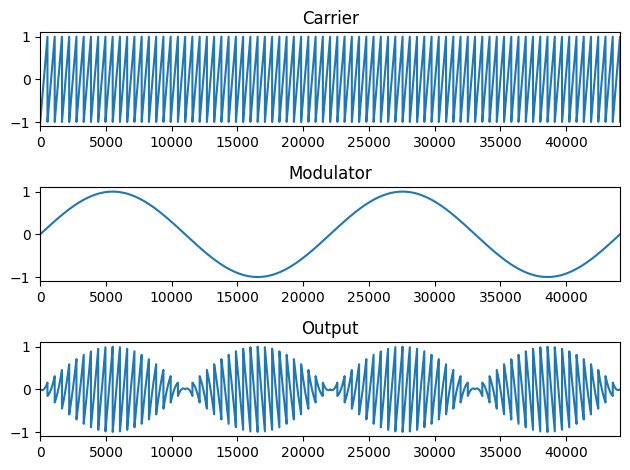

In [63]:
# To achieve AM all we need is a carrier and modulator that we multiply together.
# 4 second time series
t = np.linspace(0,4,44100*4)
s = sawtooth(2*np.pi*80*t) #80 Hz carrier 
lfo = np.sin(2*np.pi*2*t) #2 Hz modulator
am_out = (s*lfo) #output

#zoom in on x-lim to better see output
plt.subplot(3,1,1)
plt.plot(s)
plt.title('Carrier')
plt.xlim(0,44100)
plt.subplot(3,1,2)
plt.plot(lfo)
plt.title('Modulator')
plt.xlim(0,44100)
plt.subplot(3,1,3)
plt.plot(am_out)
plt.title('Output')
plt.xlim(0,44100)
plt.tight_layout()

In [64]:
Audio(am_out, rate=44100) 

Note that in order to avoid the "doubling" of the rate of modulation, we need to add a "DC offset" of 1 to the modulator wave (i.e., we need to bring all values in the modulator to positive values). This explains the "+1" DC offset in the earlier formula.

In [65]:
#Example to illustrate the effect of adding DC offset:
s = sawtooth(2*np.pi*80*t) #80 Hz carrier 
lfo = np.sin(2*np.pi*2*t) #2 Hz modulator
am_out = (s*lfo) #output above - no DC offset
am_out2 = ((1+lfo)*s) #DC offset included

In [66]:
#5 Hz modulator, no DC offset
Audio(am_out, rate=44100)

In [67]:
#5Hz modulator with DC offset
Audio(am_out2, rate=44100)

Notice that since the modulator ampitude touches zero this actually has the effect of "pulsing" the sound. We can change the depth of the modulator by manipulating the amplitude of the modulator (i.e., *modulation index*) 

In [68]:
am_out = (s*(1+lfo)) #adding DC offset back in to show comparison
s = sawtooth(2*np.pi*80*t) #same 80 Hz carrier 
lfo = .5*np.sin(2*np.pi*2*t) #same 2 Hz modulator
s_mod = (1+lfo)*s #.5 modulation index

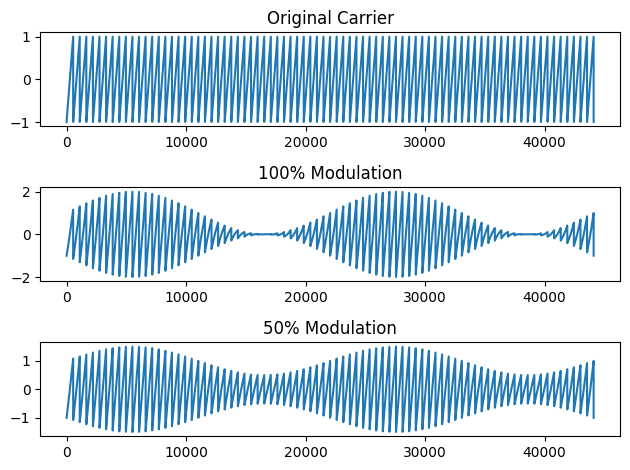

In [69]:
#zoom in on x-lim to better see output
plt.subplot(3,1,1)
plt.plot(s[:44101])
plt.title('Original Carrier')
plt.subplot(3,1,2)
plt.plot(am_out2[:44101])
plt.title('100% Modulation')
plt.subplot(3,1,3)
plt.plot(s_mod[:44101])
plt.title('50% Modulation')
plt.tight_layout()

#hide_toggle()

In [70]:
Audio(s_mod, rate=44100)  

Notice that the modulating frequency does not have to be a sinusoid. Let's try with a square wave as the modulator:

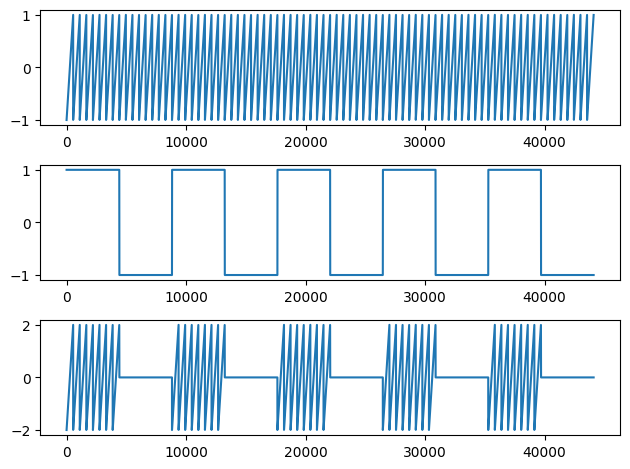

In [71]:
t = np.linspace(0,4,44100*4)
s2 = sawtooth(2*np.pi*80*t) #80 Hz carrier 
lfo2 = square(2*np.pi*5*t) #5 Hz modulator - changed from sinusoid to square shape
am_out2 = ((1+lfo2) * s2) #output

plt.subplot(3,1,1)
plt.plot(s2[:44100])
plt.subplot(3,1,2)
plt.plot(lfo2[:44100])
plt.subplot(3,1,3)
plt.plot(am_out2[:44100])
plt.tight_layout()

In [72]:
Audio(am_out2, rate=44100)

We can of course change our carrier (and modulator) to be whatever type of wave we like:

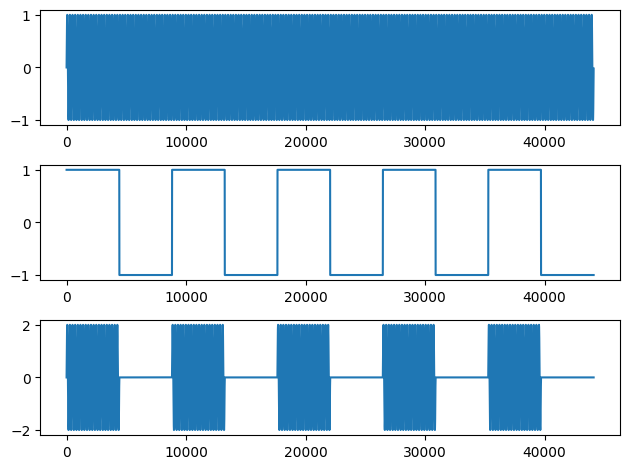

In [73]:
t = np.linspace(0,4,44100*4)
s3 = np.sin(2*np.pi*200*t) #200 Hz sinusoidal carrier 
lfo3 = square(2*np.pi*5*t) #5 Hz square modulator 
am_out3 = ((1+lfo3)*s3) #output

plt.subplot(3,1,1)
plt.plot(s3[:44100])
plt.subplot(3,1,2)
plt.plot(lfo3[:44100])
plt.subplot(3,1,3)
plt.plot(am_out3[:44100])
plt.tight_layout()

In [74]:
Audio(am_out3, rate =44100)

Finally, notice the effect of increasing or decreasing the frequency of the modulator...

In [75]:
t = np.linspace(0,4,44100*4)
s4 = np.sin(2*np.pi*200*t) #200 Hz carrier 
lfo4 = np.sin(2*np.pi*20*t) #20 Hz modulator
am_out4 = ((1+lfo4)*s4) #output

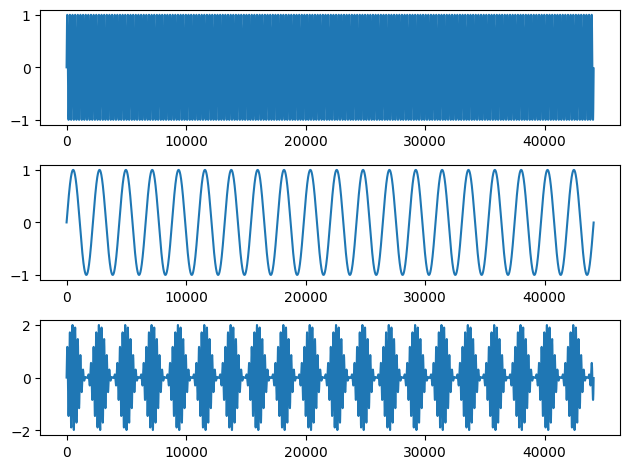

In [76]:
plt.subplot(3,1,1)
plt.plot(s4[:44100])
plt.subplot(3,1,2)
plt.plot(lfo4[:44100])
plt.subplot(3,1,3)
plt.plot(am_out4[:44100])
plt.tight_layout()
hide_toggle()

In [77]:
Audio(am_out4, rate=44100)

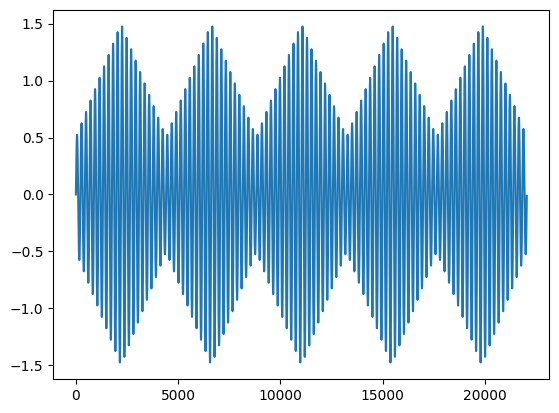

In [78]:
# 200 Hz sinusoidal carrier with 10Hz triangle modulator
# change modulator from 10 to 50

carrier = np.sin(2*np.pi*200*t)
modulator = 1 + 0.5 * sawtooth(2 * np.pi * 10 * t, 0.5)
am = carrier * modulator

plt.plot(am[:22050])

In [79]:
Audio(am, rate=44100)

When we multiply two signals together, we combine their frequency spectra in a predictable manner. (Recall that multiplication in the time domain = convolution in the frequency domain). We have the fundamental frequency set by the carrier, but we create what are referred to as *sidebands*.

The two sidebands are sum and difference frequencies of the carrier and modulator, C and M, and have amplitudes at half the amplitude of the carrier signal.
<center>

![](https://upload.wikimedia.org/wikipedia/commons/8/85/AMSpectra.png)
</center>




### LFO to create tremolo for sampled sounds

We are not limited to performing AM only with basic oscillators, though. We can do it for sampled sounds too. Lets see a few examples

In [80]:
Audio('../audio/bendir.wav') # Bendir is a Morroccan drum

In [81]:
(fs, data) = read('../audio/bendir.wav')
time = len(data)/fs
t = np.arange(0,time,1/fs)
lfo = np.sin(2*np.pi*10*t) #create 10Hz LFO same duration as input
new_s = ((1+lfo)*data)

In [82]:
Audio(new_s, rate=44100)

In [83]:
Audio('../audio/organ-C3.wav') # organ sound

In [84]:
(fs, data) = read('../audio/organ-C3.wav')
time = len(data)/fs
t = np.arange(0,time,1/fs)
lfo = .6*np.sin(2*np.pi*20*t) #12Hz LFO
new_s = ((1+lfo)*data)

In [85]:
Audio(new_s, rate=44100)